In [65]:
from tkinter import *
from PIL import Image,ImageTk
from tkinter import filedialog
import pydicom
import matplotlib.pyplot as plt
import easygui
import numpy as np
import cv2
from skimage.filters.rank import gradient
from skimage.morphology import disk, erosion, diamond, opening, white_tophat, skeletonize
from skimage.filters import threshold_otsu,threshold_minimum

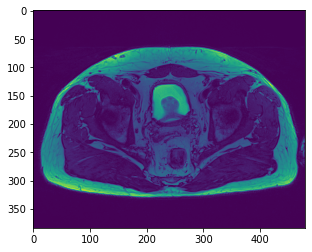

In [28]:
filepath = "PROSTATA_1.MR.0002.0013.2021.12.22.13.14.21.169473.39486806.IMA"
full_dicom = pydicom.dcmread(filepath)
img = full_dicom.pixel_array
img = (img/img.max())*255
plt.imshow(img)

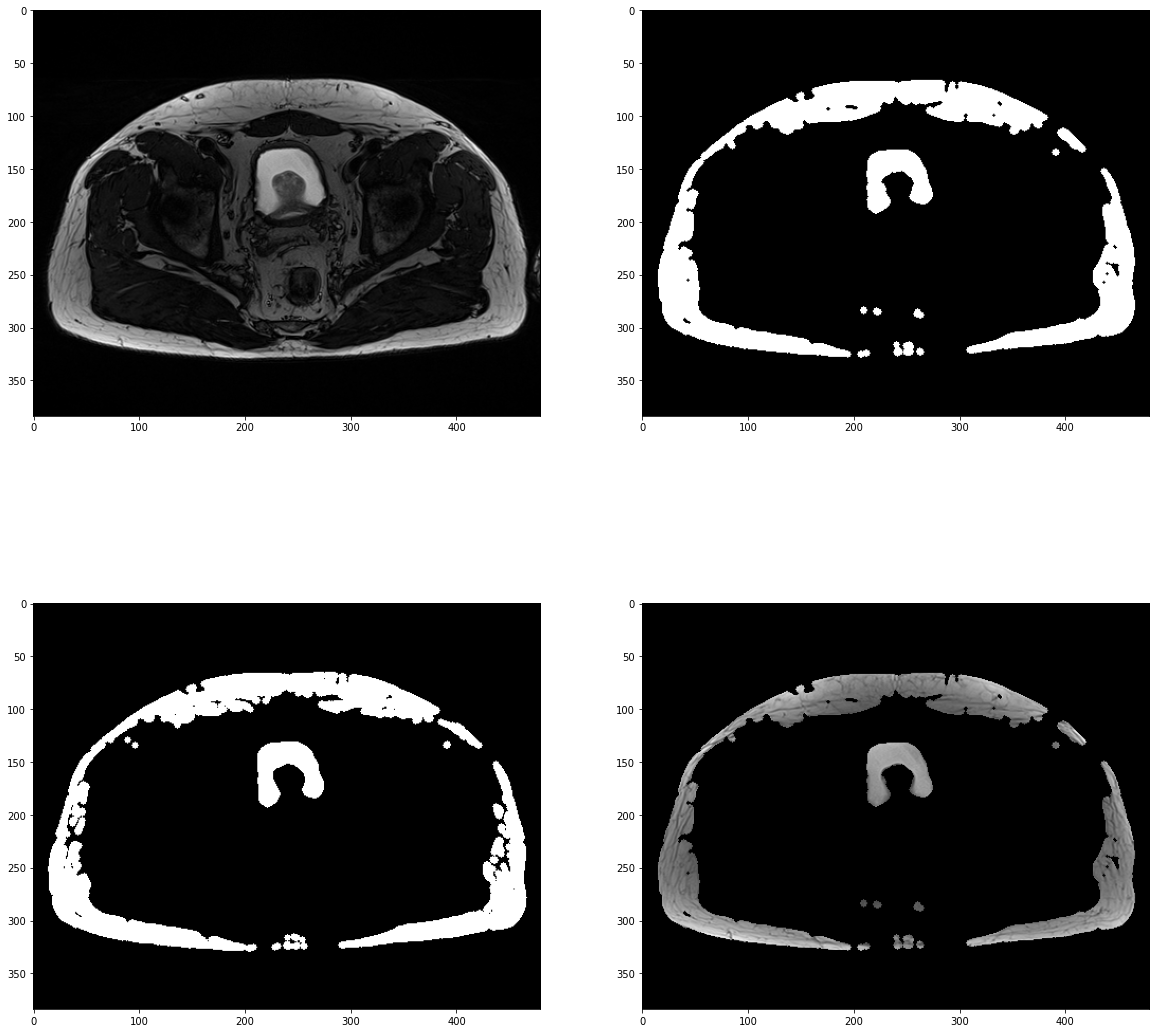

In [98]:
#img = img.astype(int)
#out = gradient(out, disk(1))

#thresh = img.mean()
thresh = threshold_otsu(img)
tresh2 = threshold_minimum(img)
out2 = img > tresh2
out = img > thresh

out = erosion(out, disk(1))
out = opening(out, disk(3))
#out2 = erosion(out2, disk(1))
out2 = opening(out2, disk(3))

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(2,2,2)
plt.imshow(out,cmap="gray")
plt.subplot(2,2,3)
plt.imshow(out2,cmap="gray")
plt.subplot(2,2,4)
plt.imshow(out*img ,cmap="gray")


In [119]:
np.size(out)

184320

In [112]:
print(np.sum(out),np.sum(out2))

23414 23577


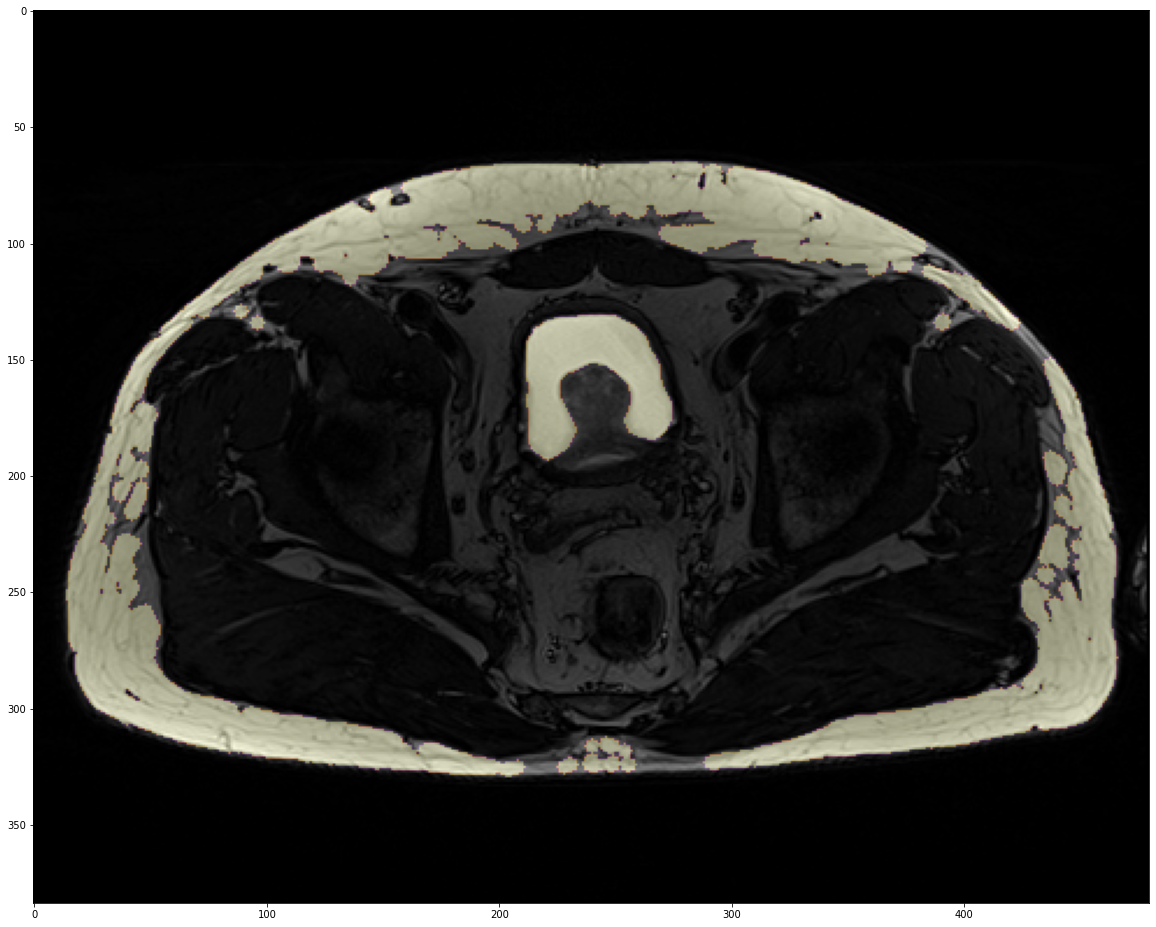

In [99]:
plt.figure(figsize=(20,20))
plt.imshow(img,cmap="gray")
plt.imshow(out2,cmap="inferno",alpha=0.3)

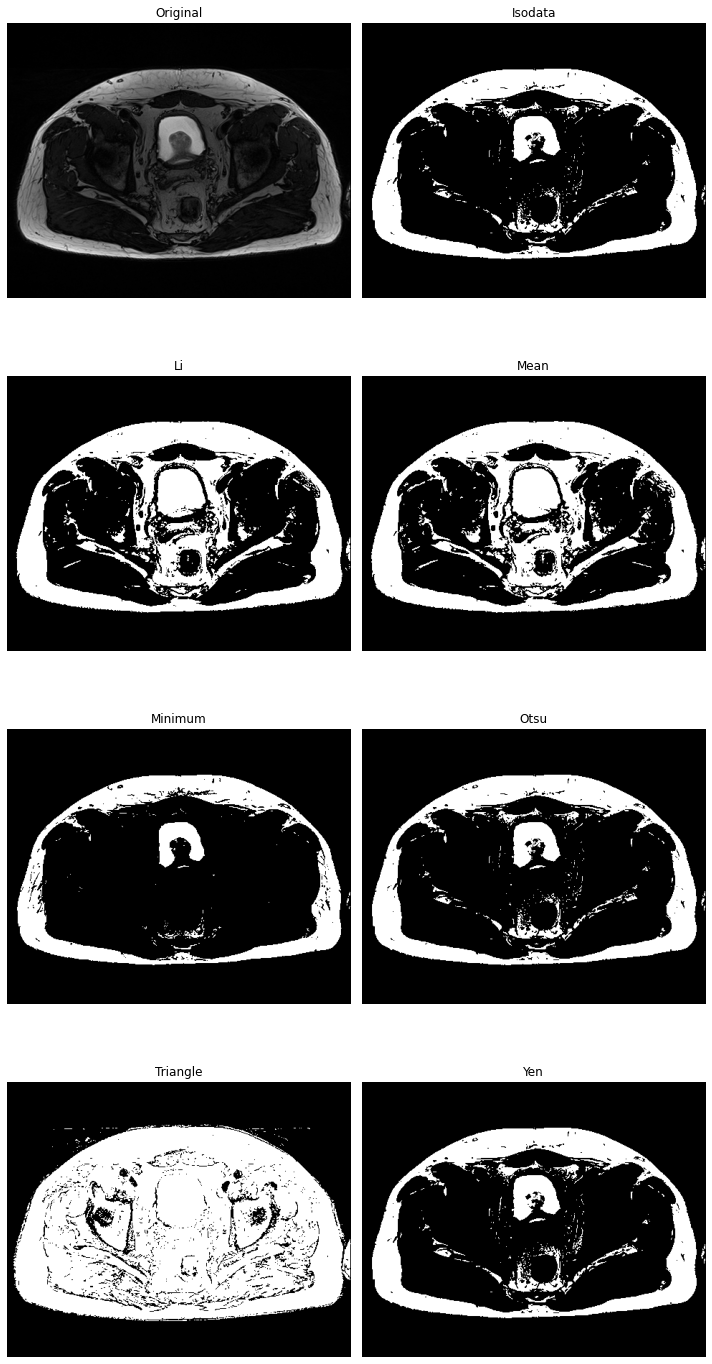

In [63]:
from skimage.filters import try_all_threshold


fig, ax = try_all_threshold(img, figsize=(10, 20), verbose=False)